<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/height_weight.csv')

In [13]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [14]:
df.isnull().sum()

,0
Height(Inches),0
Weight(Pounds),0


In [15]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [18]:
df.columns = ['Height', 'Weight']

In [19]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [20]:
X = df[['Height']]

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
y=df['Weight']

In [24]:
type(y)

pandas.core.series.Series

In [25]:
X

,Height
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=31)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)
y_pred

array([123.88442449, 139.47422071, 122.41581158, ..., 128.59371011,
       123.75802672, 135.13401042])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mae : {mae} \n mse : {mse} \n rmse : {rmse} \n r2score : {r2}')

mae : 8.033542297681825 
 mse : 101.2878997078839 
 rmse : 10.06418897417392 
 r2score : 0.2558652083871994


In [31]:
residual = y_test - y_pred

<Axes: xlabel='Weight', ylabel='Count'>

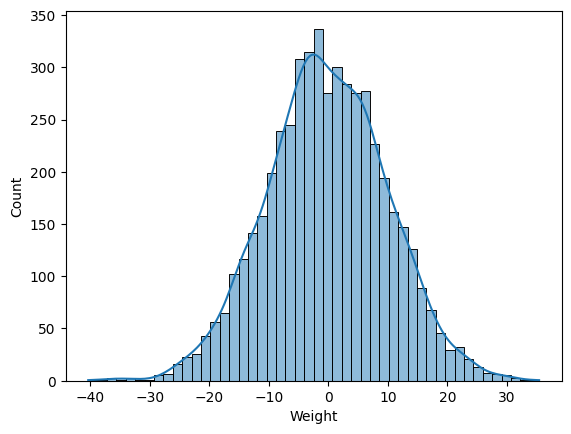

In [35]:
sns.histplot(residual, kde=True)

By above graph we can say that our model is trained good, but may be model is not suitable for data, lets check

In [41]:
sns.scatterplot(x=X_train[0], y = y_train)

ValueError: array length 1 does not match index length 20000

In [48]:
X_train.reshape(1,-1)[0]
# X_train

array([ 0.04282857,  1.62917618, -0.58790752, ..., -0.26872758,
       -0.4466861 , -0.25322254])

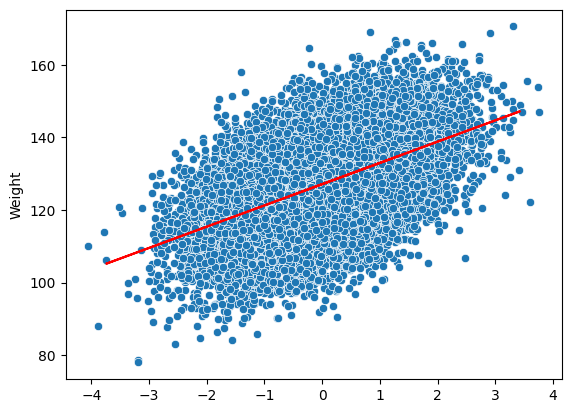

In [52]:
sns.scatterplot(x=X_train.reshape(1,-1)[0], y = y_train)
plt.plot(X_test, y_pred , color = 'r')

Since the data is not perfectly linear, the results are not so good, but ok